# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [8]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [9]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [10]:
def display_images(batch):
    """
    This function shows images in batches along
    with ground truth bounding boxes and labels
    identified with different colors
    """
    # Color mapping of classes 
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    f, ax = plt.subplots(1, figsize=(20,10))

    filename = batch['filename']
    img = batch['image'].numpy()
    img_shape = img.shape
    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    ax.imshow(img)

    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb
        y1 *= img_shape[0]
        x1 *= img_shape[1]
        y2 *= img_shape[0]
        x2 *= img_shape[1]
        
        rec = patches.Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', 
                                edgecolor=colormap[cl])
        ax.add_patch(rec)
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

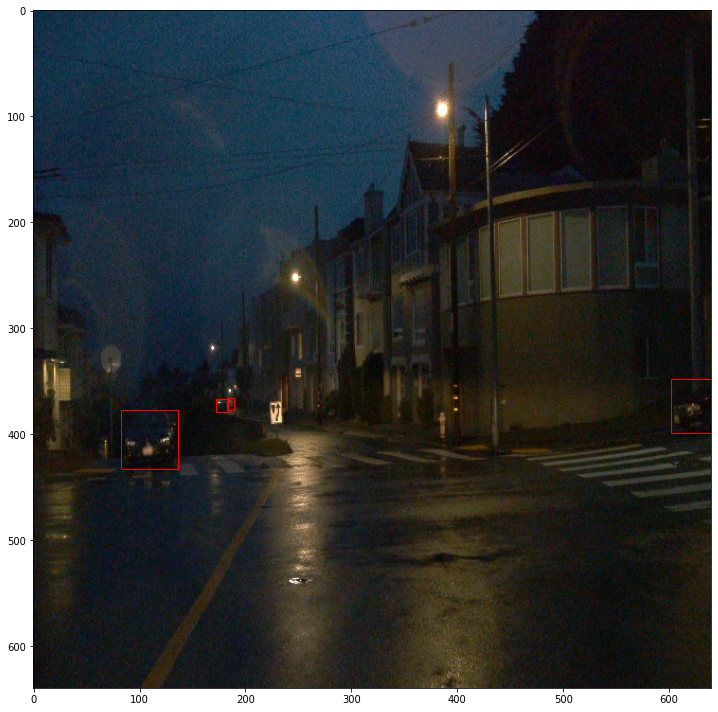

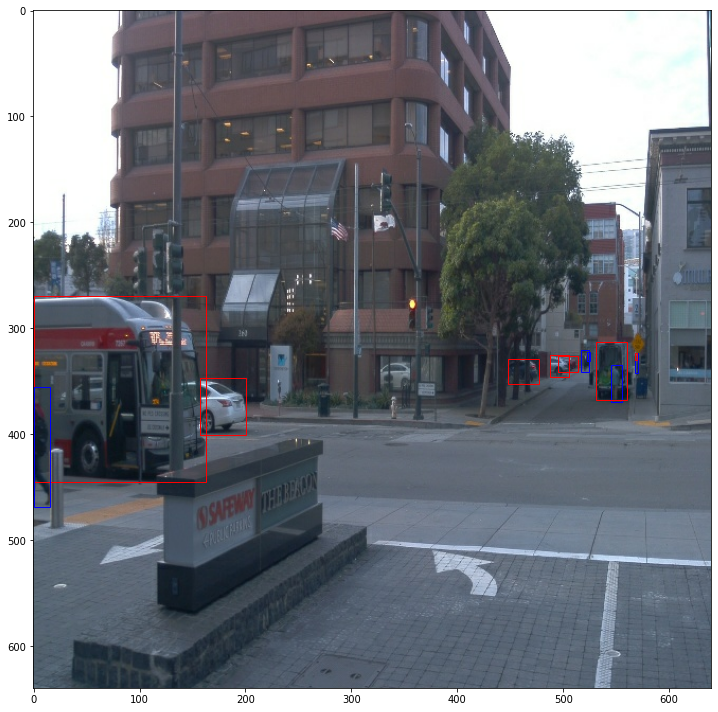

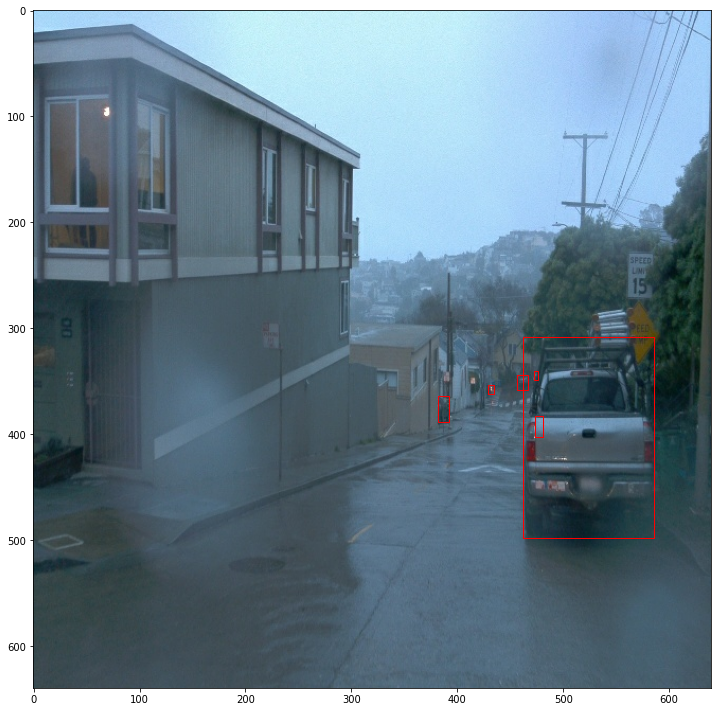

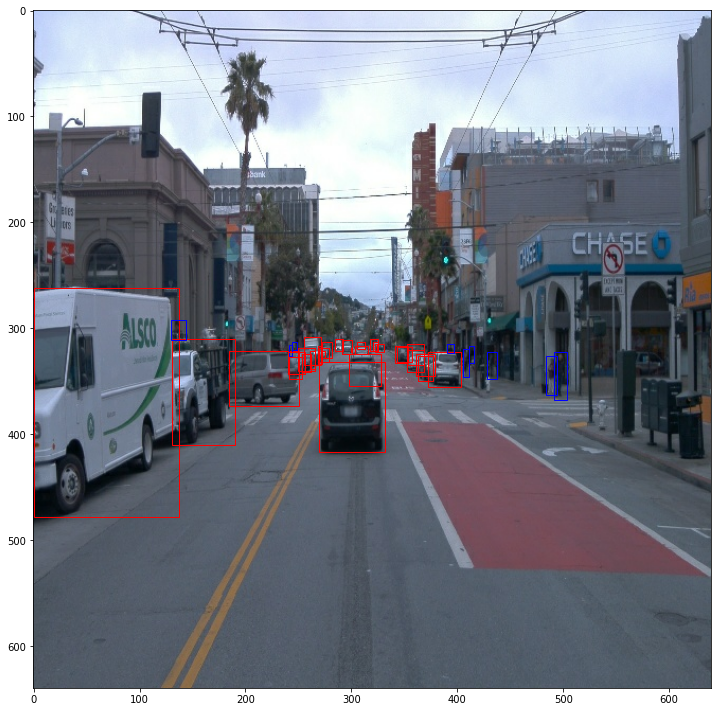

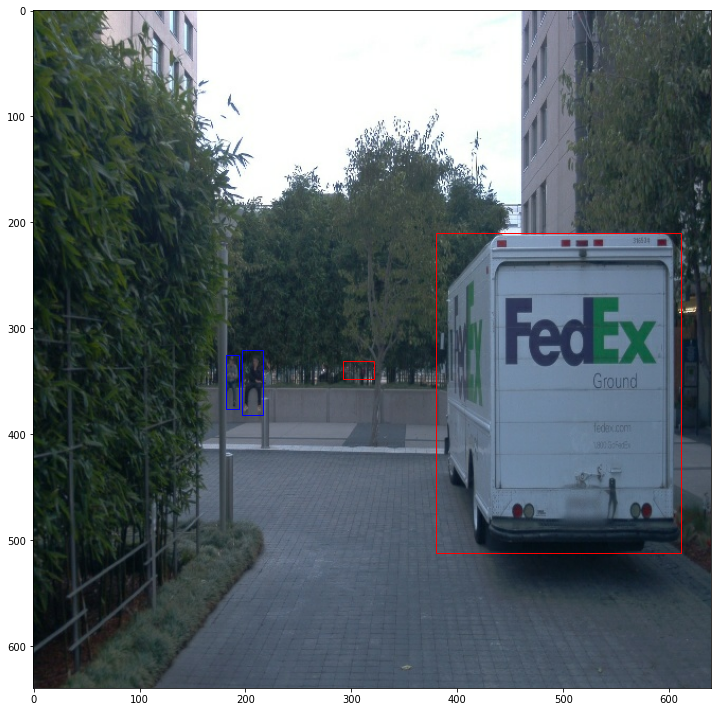

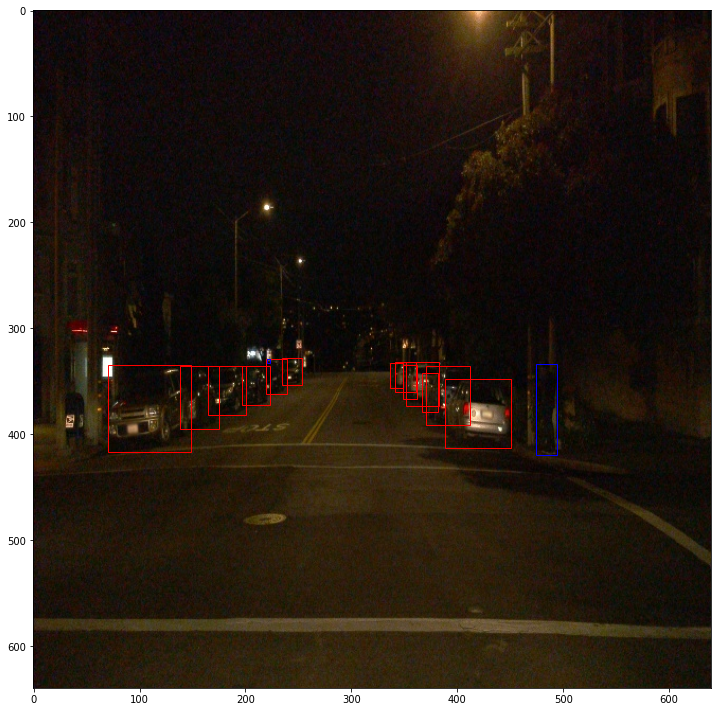

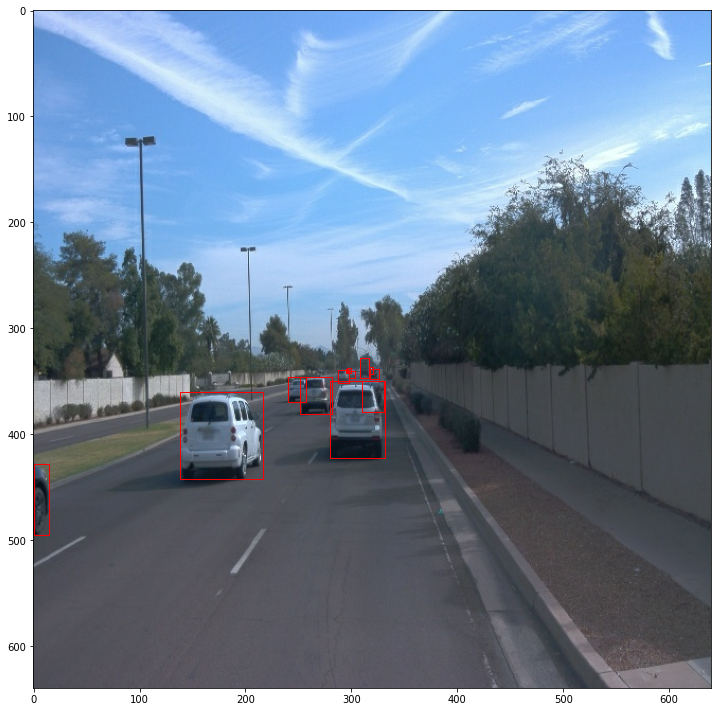

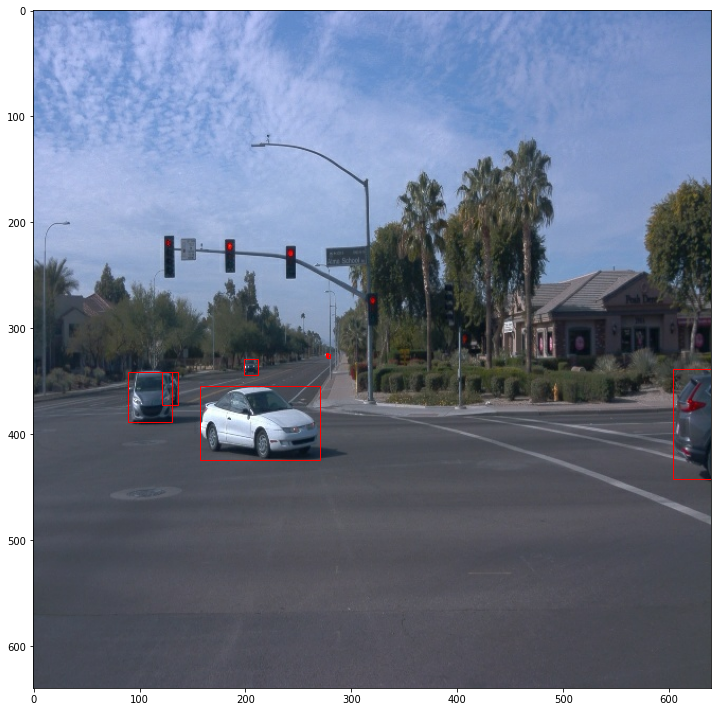

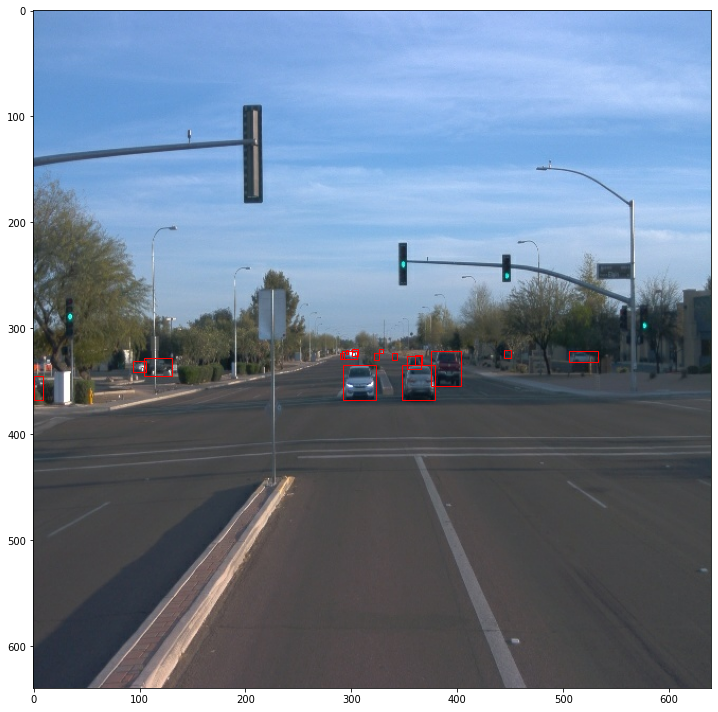

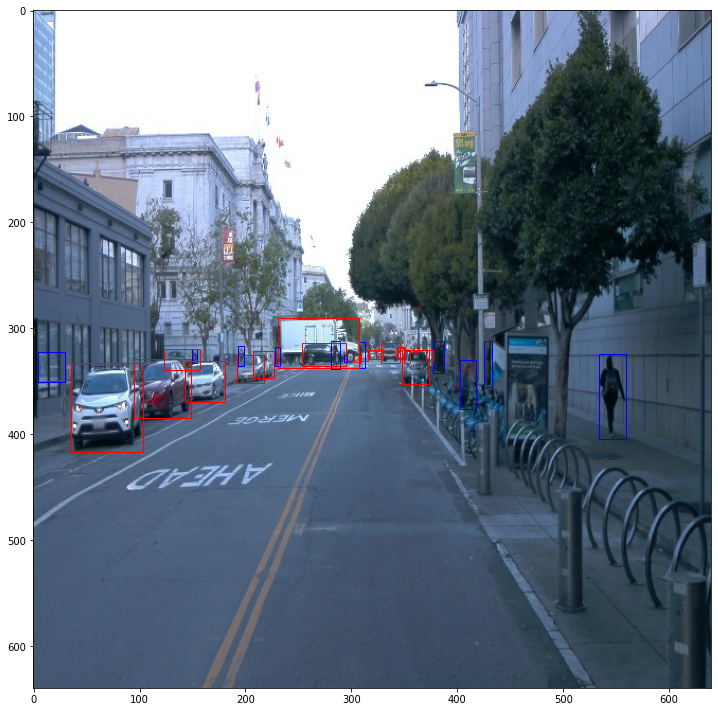

In [11]:
# Display 10 random images in dataset
dataset.shuffle(100)

for image in dataset.take(10):
    display_images(image)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [12]:
def class_count_in_dataset(batch):
    ## Visualize the distribution of classes in the dataset
    classes = batch['groundtruth_classes'].numpy().tolist()
    count_1 = classes.count(1)
    count_2 = classes.count(2)
    count_4 = classes.count(4)

    return count_1, count_2, count_4

In [13]:
class_count = {1: [], 2: [], 4: []}
for image in dataset.take(20000):
    count_1, count_2, count_4 = class_count_in_dataset(image)
    class_count[1].append(count_1)
    class_count[2].append(count_2)
    class_count[4].append(count_4)

In [14]:
sum_of_classes = {}
for key,value in class_count.items():
    sum_of_classes[key] = sum(value)

The distribution of classes in 20000 samples is: 345638 vehicles | 96842 pedestrians | 2473 cyclists


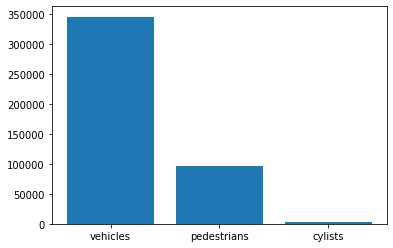

In [15]:
print("The distribution of classes in 20000 samples is: {} vehicles | {} pedestrians | {} cyclists"
      .format(sum_of_classes[1], sum_of_classes[2], sum_of_classes[4]))

fig = plt.figure()
plt.bar(['vehicles', 'pedestrians', 'cylists'], sum_of_classes.values())
plt.show()

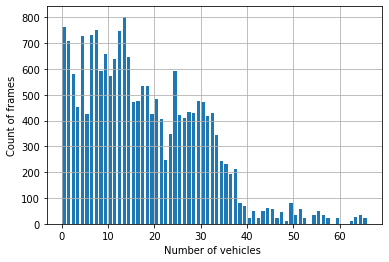

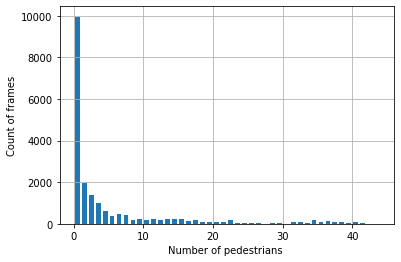

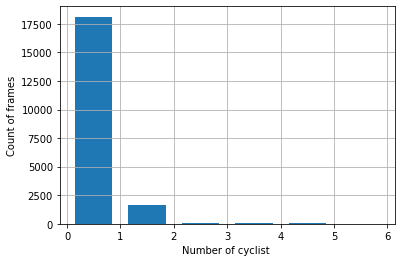

In [21]:
## Distribution of classes in frames of image
for key in class_count:
    plt.hist(class_count[key],bins = max(class_count[key]), rwidth=0.7)
    plt.ylabel("Count of frames")
    if key==1:
        plt.xlabel("Number of vehicles ")
    elif key==2:
        plt.xlabel("Number of pedestrians ")
    else:
        plt.xlabel("Number of cyclist ")
    plt.grid('on')
    plt.show()